# Spectrum analysis with Gammapy (run pipeline)

In this tutorial we will learn how to perform a 1d spectral analysis.

We will use a "pipeline" or "workflow" class to run a standard analysis. If you're interested in implementation detail of the analysis in order to create a custom analysis class, you should read the ([spectrum_analysis.ipynb](spectrum_analysis.ipynb)) that executes the analysis using lower-level classes and methods in Gammapy. 

In this tutorial we will use the folling Gammapy classes:

- [gammapy.data.DataStore](http://docs.gammapy.org/en/latest/api/gammapy.data.DataStore.html) to load the data to 
- [gammapy.scripts.SpectrumAnalysisIACT](http://docs.gammapy.org/en/latest/api/gammapy.scripts.SpectrumAnalysisIACT.html) to run the analysis

We use 4 Crab observations from H.E.S.S. for testing.

## Setup

As usual, we'll start with some setup for the notebook, and import the functionality we need.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from regions import CircleSkyRegion
from astropy.coordinates import SkyCoord
import astropy.units as u

from gammapy.utils.energy import EnergyBounds
from gammapy.data import DataStore
from gammapy.scripts import SpectrumAnalysisIACT

from gammapy.background import ReflectedRegionsBackgroundEstimator
from gammapy.spectrum import SpectrumExtraction, SpectrumFit, models

## Select data

In real life you would do something fancy here, or just use the list of observations someone send you (and hope they have done something fancy before). We'll just use the standard gammapy 4 crab runs.

In [2]:
# TODO: Replace with public data release
store_dir = '$GAMMAPY_EXTRA/datasets/hess-crab4-hd-hap-prod2'
data_store = DataStore.from_dir(store_dir)
obs_id = data_store.obs_table['OBS_ID'].data
print("Use observations {}".format(obs_id))

obs_list = data_store.obs_list(obs_id)

Use observations [23523 23526 23559 23592]


## Configure the analysis

TODO: Make this available via a config dict/file

In [3]:
# Don't write output files
outdir = None

crab_pos = SkyCoord.from_name('crab')
on_region = CircleSkyRegion(crab_pos, 0.15 * u.deg)
model = models.LogParabola(alpha = 2.3,
                           beta = 0,
                           amplitude = 1e-11 * u.Unit('cm-2 s-1 TeV-1'),
                           reference = 1 * u.TeV)
flux_point_binning = EnergyBounds.equal_log_spacing(0.7, 30, 5, u.TeV)

background_estimator = ReflectedRegionsBackgroundEstimator(on_region=on_region)
extraction = SpectrumExtraction(on_region=on_region, containment_correction=True)
fit = SpectrumFit(forward_folded=True, model=model, stat='wstat')

## Run the analysis

TODO: Clean up the log (partly done, get rid of remaining useless warnings)

In [4]:
ana = SpectrumAnalysisIACT(observations=obs_list,
                           background_estimator=background_estimator,
                           extraction=extraction,
                           fit=fit,
                           outdir=outdir,
                           fp_binning = flux_point_binning)
ana.run()


INFO:gammapy.background.reflected:Running ReflectedRegionsBackgroundEstimator
Region: CircleSkyRegion
center: <SkyCoord (ICRS): (ra, dec) in deg
    ( 83.6332124,  22.0144601)>
radius: 0.15 deg
INFO:gammapy.background.reflected:Processing observation Info for OBS_ID = 23523
- Start time: 53343.92
- Pointing pos: RA 83.63 deg / Dec 21.51 deg
- Observation duration: 1687.0 s
- Dead-time fraction: 6.240 %

INFO:gammapy.background.reflected:Found 8 reflected regions
INFO:gammapy.background.reflected:Processing observation Info for OBS_ID = 23526
- Start time: 53343.95
- Pointing pos: RA 83.63 deg / Dec 22.51 deg
- Observation duration: 1683.0 s
- Dead-time fraction: 6.555 %

INFO:gammapy.background.reflected:Found 8 reflected regions
INFO:gammapy.background.reflected:Processing observation Info for OBS_ID = 23559
- Start time: 53345.96
- Pointing pos: RA 85.25 deg / Dec 22.01 deg
- Observation duration: 1686.0 s
- Dead-time fraction: 6.398 %

INFO:gammapy.background.reflected:Found 29 refl

## Check out the results

TODO: Nice summary page with all results

In [5]:
print(ana.fit.result[0])


Fit result info 
--------------- 
Model: LogParabola
ParameterList
Parameter(name=u'amplitude', value=2.274060841979059e-11, unit=Unit("1 / (cm2 s TeV)"), min=0, max=None, frozen=False)
Parameter(name=u'reference', value=1.0, unit=Unit("TeV"), min=None, max=None, frozen=True)
Parameter(name=u'alpha', value=1.7500917445666038, unit=u'', min=None, max=None, frozen=False)
Parameter(name=u'beta', value=0.23445909503490811, unit=u'', min=None, max=None, frozen=False)

Covariance: [[  1.38876177e-24   0.00000000e+00   3.17474408e-14   2.39992258e-15]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  3.17474408e-14   0.00000000e+00   1.02643728e-02  -4.21156003e-03]
 [  2.39992258e-15   0.00000000e+00  -4.21156003e-03   2.42164552e-03]] 

Statistic: 30.310 (wstat)
Fit Range: [   0.68129207  100.        ] TeV



(<matplotlib.axes._subplots.AxesSubplot at 0x7f6a4a00b590>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f6a49f7b810>)

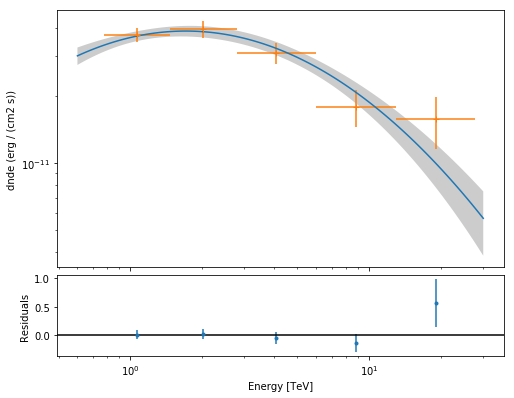

In [6]:
ana.spectrum_result.plot(energy_range=[0.6, 30] * u.TeV,
                         energy_power=2, flux_unit='erg-1 cm-2 s-1',
                         fig_kwargs=dict(figsize = (8,8)))